# Overview

In [29]:
# importing all the libraries needed 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error

#For date time functions
from datetime import datetime
from datetime import timedelta
import math

# Importing the most popular regression libraries.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, ridge_regression, Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
features = pd.read_csv('features.csv')
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [3]:
stores = pd.read_csv('stores.csv')
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [4]:
train = pd.read_csv('train.csv')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
test = pd.read_csv('test.csv')
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [6]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

# Merge data

In [8]:
data = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='inner').merge(stores, on='Store', how='inner')
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [9]:
data.tail(75)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421495,45,90,2012-10-19,23236.49,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421496,45,91,2012-10-19,15985.60,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421497,45,92,2012-10-19,48108.38,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421498,45,93,2012-10-19,2270.50,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421499,45,94,2012-10-19,4655.65,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


In [10]:
sales = (data['Weekly_Sales'].groupby(data['Size']).sum()).reset_index()
# index = []
# for i in range(sales.size):
#     index.append(sales[i]/data['Size'][i])
# index.
index = sales['Weekly_Sales']/sales['Size']
index

0     1303.962406
1     1540.081704
2     4330.702968
3     4282.336335
4     2205.577795
5     1458.939358
6     1298.187412
7     1153.935983
8     1371.229545
9      823.827445
10    1268.512766
11    1285.547053
12    1735.313122
13     950.722303
14    1230.171789
15    1285.626832
16     720.347866
17     618.194106
18    2146.971939
19     788.881007
20     771.350453
21    1469.800144
22     940.355208
23     837.973027
24     889.009819
25     874.367627
26    1126.753947
27     923.701157
28    1438.540510
29    1361.210640
30    1104.941264
31     821.741350
32    1479.311053
33     979.700150
34    1965.719012
35    1243.270368
36    1455.064550
37     917.410789
38     934.764923
39    1304.594730
dtype: float64

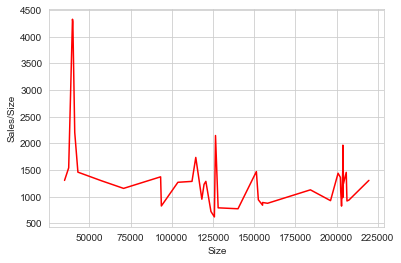

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(sales['Size'], index, color='red')
plt.xlabel('Size')
plt.ylabel('Sales/Size')
plt.show()


In [12]:
x = data['Weekly_Sales'].where(data['Dept'] == 92).sum()
x

483943341.87000006

In [13]:
#Merging the three csv files using inner join.
data_train =pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='inner').merge(stores, on='Store', how='inner')
data_test = pd.merge(test, features, on=['Store', 'Date', 'IsHoliday'], how='inner').merge(stores, on='Store', how='inner')


In [14]:
# Removing rows with null values in all columns
data_train.dropna(axis=0, how="all", inplace=True)
data_test.dropna(axis=0, how='all', inplace=True)
# Removing all rows with null values in all rows
data_train.dropna(axis=1, how="all", inplace=True)
data_test.dropna(axis=1, how='all',inplace=True)
data_train.shape

(421570, 16)

In [15]:
data_train['IsHoliday'] = data_train['IsHoliday'].apply(lambda x: 1 if x == True else 0)
data_test['IsHoliday'] = data_test['IsHoliday'].apply(lambda x: 1 if x == True else 0)

data_train['Type'] = data_train['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))
data_test['Type'] = data_test['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))

In [16]:
data_train.isna().sum()[data_train.isna().sum() > 0].sort_values(ascending=False)

data_test.isna().sum()[data_test.isna().sum() > 0].sort_values(ascending=False)

data_train.fillna(0, inplace = True)

data_test['CPI'].fillna(data_test['CPI'].mean(), inplace = True)
data_test['Unemployment'].fillna(data_test['Unemployment'].mean(), inplace = True)

data_test.fillna(0, inplace = True)

In [17]:
def transform_datetime(data):
    data.Date = pd.to_datetime(data.Date)
    data['Year']  = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Week']  = data.Date.dt.week

transform_datetime(data_train)
transform_datetime(data_test)
data_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,2010,2,5
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,2010,2,5
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,2010,2,5
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,2010,2,5
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,2010,2,5


In [18]:
features = [feature for feature in data_train.columns if feature not in ('Date','Weekly_Sales')]

In [19]:
X = data_train[features].copy()
y = data_train.Weekly_Sales.copy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
param_grid = { 
    'n_estimators': [20,30,50,60],
    'max_features': ['auto', 'sqrt', 'none'],
    'max_depth' : [5,15, 25],
}
rf = RandomForestRegressor(random_state=42)
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
CV_rf.fit(X_train, y_train)

In [30]:
forest = CV_rf.best_estimator_

reg_prediction=forest.predict(X_valid)

print (CV_rf.best_score_, CV_rf.best_params_)


0.970439711530174 {'max_depth': 25, 'max_features': 'auto', 'n_estimators': 50}


In [36]:
def weighted_mae(dataset, expected, predicted):
    weights = dataset['IsHoliday'].apply(lambda x: 5 if x else 1)
    
    return np.round(np.sum(weights * abs(expected - predicted)) * (1/np.sum(weights)), 2)

In [32]:
valid_predictions = forest.predict(X_valid)
print(f'- WMAE {weighted_mae(X_valid, y_valid, valid_predictions)}\
      \n- RMSE {mean_squared_error(y_valid, valid_predictions, squared=False):.2f}')

- WMAE 1616.32      
- RMSE 3570.67


In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_valid)
print(f'- WMAE {weighted_mae(X_valid, y_valid, y_pred)}\
      \n- RMSE {mean_squared_error(y_valid, y_pred, squared=False):.2f}')

- WMAE 14774.03      
- RMSE 21875.41


In [ ]:
ridge_params = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge_regression = Ridge()
ridge_regression_cv = GridSearchCV(ridge_regression, ridge_params, cv=3)
ridge_regression_cv.fit(X_train, y_train)

In [46]:
ridge_regression = Ridge(alpha=0.1)
ridge_regression.fit(X_train, y_train)
ridge_predictions = ridge_regression.predict(X_valid)
print(f'- WMAE {weighted_mae(X_valid, y_valid, ridge_predictions)}\
        \n- RMSE {mean_squared_error(y_valid, ridge_predictions, squared=False):.2f}')
        

- WMAE 14773.91        
- RMSE 21875.41


In [ ]:
best_ridge = ridge_regression_cv.best_estimator_
ridge_predictions = best_ridge.predict(X_valid)
print(f'- WMAE {weighted_mae(X_valid, y_valid, ridge_predictions)}\
        \n- RMSE {mean_squared_error(y_valid, ridge_predictions, squared=False):.2f}')

In [47]:
dc_tree = DecisionTreeRegressor(random_state=42)
dc_tree.fit(X_train, y_train)
dc_tree_predictions = dc_tree.predict(X_valid)
print(f'- WMAE {weighted_mae(X_valid, y_valid, dc_tree_predictions)}\
        \n- RMSE {mean_squared_error(y_valid, dc_tree_predictions, squared=False):.2f}')

- WMAE 2062.27        
- RMSE 4563.27


In [49]:
dctree_params = {'max_depth': [5, 15, 25]
                 ,'min_samples_split': [2, 5, 10] 
                 ,'min_samples_leaf': [1, 2, 5],
                 'max_features': ['auto', 'sqrt', 'none']}
dctree_regression = DecisionTreeRegressor(random_state=42)
dctree_regression_cv = GridSearchCV(dctree_regression, dctree_params)
dctree_regression_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 15, 25],
                         'max_features': ['auto', 'sqrt', 'none'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [52]:
dctree_regression_cv.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [50]:
dc_tree = dctree_regression_cv.best_estimator_
dc_tree_predictions = dc_tree.predict(X_valid)
print(f'- WMAE {weighted_mae(X_valid, y_valid, dc_tree_predictions)}\
        \n- RMSE {mean_squared_error(y_valid, dc_tree_predictions, squared=False):.2f}')

- WMAE 1931.26        
- RMSE 4578.50
